In [2]:
import threading
import os

In [8]:
def task1():
    print("Task 1 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 1: {}".format(os.getpid()))

def task2():
    print("Task 2 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))

if __name__ == "__main__":
    # print ID of current process
    print("ID of process running main program: {}".format(os.getpid()))
 
    # print name of main thread
    print("Main thread name: {}".format(threading.current_thread().name))
 
    # creating threads
    t1 = threading.Thread(target=task1, name='t1')
    t2 = threading.Thread(target=task2, name='t2') 
 
    # starting threads
    t1.start()
    t2.start()
 
    # wait until all threads finish
    t1.join()
    t2.join()

ID of process running main program: 23176
Main thread name: MainThread
Task 1 assigned to thread: t1
ID of process running task 1: 23176
Task 2 assigned to thread: t2
ID of process running task 2: 23176


In [19]:
import threading
x = 0
def increment():
    global x
    x += 1
def thread_task():
    for _ in range(100000):
        increment()
def main_task():
    global x
    x = 0
    t1 = threading.Thread(target=thread_task)
    t2 = threading.Thread(target=thread_task)
    t1.start()
    t2.start()
    t1.join()
    t2.join()
if __name__ == "__main__":
    for i in range(10):
        main_task()
        print("Iteration {0}: x = {1}".format(i,x))

Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


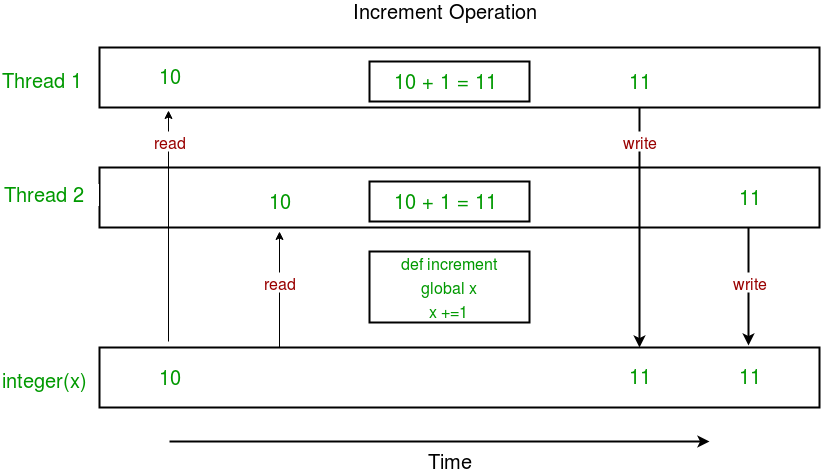

In [16]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/multithreadingfinal.png")

# Threading with lock

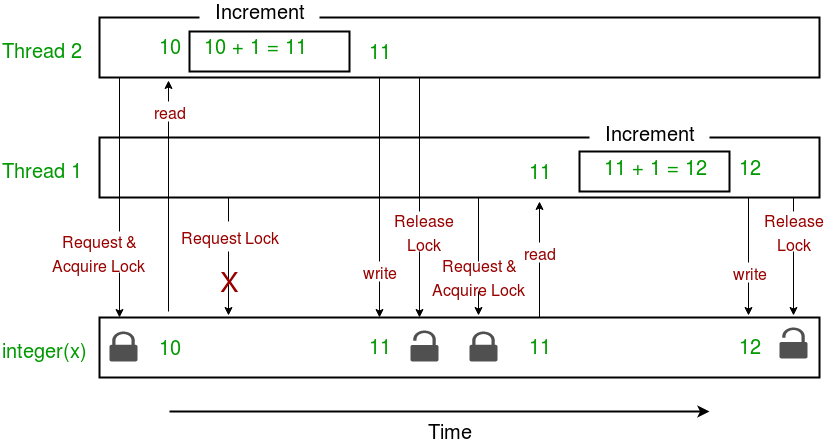

In [17]:
Image("https://media.geeksforgeeks.org/wp-content/uploads/multithreading-python-3.png")

In [22]:
# global variable x
x = 0
  
def increment():
    global x
    x += 1
def thread_task(lock):
    for _ in range(100000):
        lock.acquire() #if lock is not release, lock cannot be acquired. Other thread cannot access increment.
        increment()
        lock.release()
def main_task():
    global x
    x = 0
    # creating a lock
    lock = threading.Lock()
    t1 = threading.Thread(target=thread_task, args=(lock,))
    t2 = threading.Thread(target=thread_task, args=(lock,))
    t1.start()
    t2.start()
    t1.join()
    t2.join()

if __name__ == "__main__":
    for i in range(10):
        main_task()
        print("Iteration {0}: x = {1}".format(i,x))

Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


In [3]:
import threading
import logging
import time
logging.basicConfig(level=logging.DEBUG,
                    format='(%(threadName)-9s) %(message)s',)
class Account():
    def __init__(self, name=None):
        self._name = name
        self._amount = 0
    
    def deposit(self, amt):
        self._amount+=amt
        self.get_amount()
        
    def withdraw(self, amt):
        self._amount-=amt
        self.get_amount()
        
    def get_amount(self):
        logging.debug(f'Amount in the acc: {self._amount}')
        
        
def worker_a(lock, acc):
    for i in range(5):
        logging.debug('Trying to acquire')
        lock.acquire()
        time.sleep(2)
        acc.deposit(10)
        logging.debug('Releasing')
        lock.release()

def worker_b(lock, acc):
    for i in range(5):
        logging.debug('Trying to acquire')
        lock.acquire()
        acc.withdraw(10)
        logging.debug('Releasing')
        lock.release()
        
def worker_c(acc):
    for i in range(5):
        logging.debug('Trying to deposit')
        time.sleep(2)
        acc.deposit(10)
        logging.debug('Done despoiting')

def worker_d(acc):
    for i in range(5):
        logging.debug('Trying to withdraw')
        acc.withdraw(10)
        logging.debug('Done withdrawing')


In [4]:
a = Account("Company")
lock = threading.Lock()
t1 = threading.Thread(target=worker_a, args=(lock, a))
t1.start()
t2 = threading.Thread(target=worker_b, args=(lock, a))
t2.start()
t1.join()
t2.join()

(Thread-7 ) Trying to acquire
(Thread-8 ) Trying to acquire
(Thread-7 ) Amount in the acc: 10
(Thread-7 ) Releasing
(Thread-7 ) Trying to acquire
(Thread-8 ) Amount in the acc: 0
(Thread-8 ) Releasing
(Thread-8 ) Trying to acquire
(Thread-7 ) Amount in the acc: 10
(Thread-7 ) Releasing
(Thread-7 ) Trying to acquire
(Thread-8 ) Amount in the acc: 0
(Thread-8 ) Releasing
(Thread-8 ) Trying to acquire
(Thread-7 ) Amount in the acc: 10
(Thread-7 ) Releasing
(Thread-7 ) Trying to acquire
(Thread-8 ) Amount in the acc: 0
(Thread-8 ) Releasing
(Thread-8 ) Trying to acquire
(Thread-7 ) Amount in the acc: 10
(Thread-7 ) Releasing
(Thread-7 ) Trying to acquire
(Thread-8 ) Amount in the acc: 0
(Thread-8 ) Releasing
(Thread-8 ) Trying to acquire
(Thread-7 ) Amount in the acc: 10
(Thread-7 ) Releasing
(Thread-8 ) Amount in the acc: 0
(Thread-8 ) Releasing


In [6]:
b = Account("Company")
lock = threading.Lock()
t3 = threading.Thread(target=worker_c, args=(b,))
t3.start()
t4 = threading.Thread(target=worker_d, args=(b,))
t4.start()

(Thread-11) Trying to deposit
(Thread-12) Trying to withdraw
(Thread-12) Amount in the acc: -10
(Thread-12) Done withdrawing
(Thread-12) Trying to withdraw
(Thread-12) Amount in the acc: -20
(Thread-12) Done withdrawing
(Thread-12) Trying to withdraw
(Thread-12) Amount in the acc: -30
(Thread-12) Done withdrawing
(Thread-12) Trying to withdraw
(Thread-12) Amount in the acc: -40
(Thread-12) Done withdrawing
(Thread-12) Trying to withdraw
(Thread-12) Amount in the acc: -50
(Thread-12) Done withdrawing
(Thread-11) Amount in the acc: -40
(Thread-11) Done despoiting
(Thread-11) Trying to deposit
(Thread-11) Amount in the acc: -30
(Thread-11) Done despoiting
(Thread-11) Trying to deposit
(Thread-11) Amount in the acc: -20
(Thread-11) Done despoiting
(Thread-11) Trying to deposit
(Thread-11) Amount in the acc: -10
(Thread-11) Done despoiting
(Thread-11) Trying to deposit
(Thread-11) Amount in the acc: 0
(Thread-11) Done despoiting


In [48]:
# Check if t1 thread is running
't1' in [i.name for i in threading.enumerate()]

False

hello, world
